# Einleitung: Lineare Regression

Bei der linearen Regression liegen Beispieldatenpunkte

    (x1,y1), (x2,y2), ..., (xn,yn)

vor. Gehen wir davon aus, dass es einen linearen Zusammenhang zwischen den x- und y-Werten gibt, müsste es Parameter `a` und `b` geben, so dass wir jeden y-Wert aus dem zugehörigen x-Wert berechnen können:

    y = a*x + b
    
In der Praxis liegen oft Werte vor, die einen *annähernd* linearen Zusammenhang haben. Zum Beispiel wird der Preis eines Autos in etwa mit seinem km-Stand fallen:

- niedriger km-Stand --> hoher Preis
- hoher km-Stand --> niedriger Preis

Das könnte beispielhaft in etwa (bei einem speziellen Automodell) bei einem Neupreis des Automodells von b=50.000 EUR so aussehen:

In [1]:
import numpy as np

nr_bsp = 10

autos_km_staende = np.random.randint( low=0, high=100000, size=(nr_bsp,) )

a = -0.3
b = 50000
rauschen = np.random.normal(loc=0, scale=1000.0, size=nr_bsp)
autos_preise = a * autos_km_staende + b + rauschen

In [2]:
autos_km_staende

array([27642, 49488, 22670, 97598, 84928, 87457, 18344, 36037, 62260,
       57291])

In [3]:
rauschen

array([ -177.79991784,  -184.96893563,  -330.59695988, -1291.08315134,
        1401.07721778,   590.52715981, -1609.03753145,   840.36386877,
       -1167.56637848,   149.13799087])

In [4]:
autos_preise

array([41529.60008216, 34968.63106437, 42868.40304012, 19429.51684866,
       25922.67721778, 24353.42715981, 42887.76246855, 40029.26386877,
       30154.43362152, 32961.83799087])

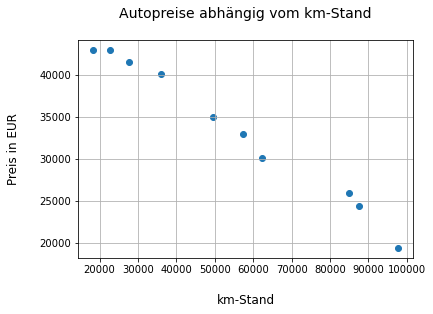

In [5]:
from matplotlib import pyplot as plt

plt.scatter(autos_km_staende, autos_preise)
plt.title("Autopreise abhängig vom km-Stand\n", fontsize=14)
plt.xlabel("\nkm-Stand", fontsize=12)
plt.ylabel("Preis in EUR\n", fontsize=12)
plt.grid()
plt.show()

Wir haben hier absichtlich etwas *Rauschen* auf jeden Preis addiert, d.h.

    Preis = Neupreis + -0.5 * km-Stand
          = 50000 - 0.5 * km-Stand
          
um den linearen Zusammenhang "aufzuweichen". Schließlich gibt es bei jedem individuellem Verkaufsgeschäft auch viel Verhandlungsspielraum.

Die Frage ist nun: können wir, wenn wir nur die beobachteten Datenpunkte haben, den linearen Zusammenhang berechnen? Mit anderen Worten: können wir `a` und `b`, die beiden Parameter, die den linearen Zusammenhang wiedergeben, aus den Datenpunkten berechnen?

# Linearen Zusammenhang berechnen

scikit-learn bietet auch hierzu natürlich eine Funktionalität bzw. Klasse namens `LinearRegression`:

In [6]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

reg = linear_model.fit(autos_km_staende.reshape(-1,1), autos_preise)

Der Rückgabewert der `fit()` Methode enthält gerade die beiden Parameter `a` und `b`.

Den von sciki-learn bestimmten multiplikativen Parameter `a` erhalten sie so:

In [7]:
reg.coef_

array([-0.29231265])

Den von sciki-learn bestimmten y-Achsenabschnitt (Parameter `b`) erhalten sie so:

In [8]:
reg.intercept_

49404.032397173236

Man sieht, dass die Werte ziemlich genau den tatsächlichen Werten `a=0.3` und `b=50000` entsprechen. Nicht perfekt, denn wir haben ja auch noch ein Rauschen auf die Generierung unserer Beispieldatenpunkte addiert.

# Lineares Modell verwenden

Genauso wie Sie vorher bei dem *Naive Bayes Klassifikator* und bei dem *k-NN Klassifikator* mittels `predict()` vorhersagen für neue Daten machen konnten, können Sie nun mittels `linear_model.predict()` für neue km-Stände eine Schätzung des Verkaufspreises machen:

In [9]:
test_km_staende = np.array([0, 50000, 75000]).reshape(-1,1)

praedizierte_preise = linear_model.predict( test_km_staende )

In [10]:
praedizierte_preise

array([49404.03239717, 34788.40007057, 27480.58390727])

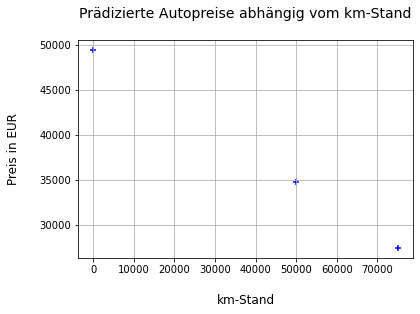

In [11]:
plt.title("Prädizierte Autopreise abhängig vom km-Stand\n", fontsize=14)
plt.xlabel("\nkm-Stand", fontsize=12)
plt.ylabel("Preis in EUR\n", fontsize=12)
plt.grid()
plt.scatter(test_km_staende, praedizierte_preise, marker="+", color="blue")

plt.show()

 # Regresssionsgerade visualisieren
 
 Man sieht schon anhand dieser drei prädizierte Preise das *lineare Verhalten* unseres linearen Regressionmodells. Warum also nicht gleich die entsprechende *gelernte Regressionsgerade* visualisieren?

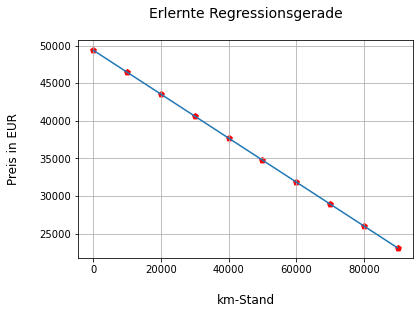

In [12]:
x_werte = np.arange(0,100000, 10000).reshape(-1,1)
y_werte = linear_model.predict(x_werte)

plt.title("Erlernte Regressionsgerade\n", fontsize=14)
plt.xlabel("\nkm-Stand", fontsize=12)
plt.ylabel("Preis in EUR\n", fontsize=12)
plt.grid()

# Plotten der Linie (Datenpunkte mit Liniensegmenten verbunden)
plt.plot(x_werte, y_werte)

# Plotten der einzelnen Datenpunkte
plt.scatter(x_werte, y_werte, marker="p", color="red")

plt.show()

# Lineare Regression mit mehreren Merkmalen

Jetzt wollen wir uns der Praxis noch ein Stück nähern. Bei den meisten Anwendungen / Datensätzen liegt aber nicht nur ein Eingabemerkmal (wie hier der km-Stand vor), sondern wir haben mehrere Eingabemerkmale, die wir nutzen können. Lassen Sie uns wieder ganz konkret werden. Bei Autos hängt der Verkaufspreis sicherlich auch von der PS-Zahl ab:

    Ein Auto mit viel PS kostet viel tendenziell mehr als ein Auto mit weniger PS
    
Das wollen wir mal simulieren, indem wir jetzt sagen, dass der Preis sich als *Linearkombination* des km-Stands und der PS-Zahl berechnet:

    Preis = Basispreis + -0.5 * km-Stand + 50.0 * PS-Zahl
          =    b       +   a1 * km-Stand +   a2 * PS-Zahl
    
In der Simulation sagen wir mit dieser Formel sozusagen: für ein PS mehr, bezahlt man auch 50 EUR mehr.

Später wird es bei dem Machine Learning darum gehen, die Parameter `a1`, `a2` und `b` anhand der Beispieldaten zu erlernen.

In [13]:
nr_bsp = 10

autos_km_staende = np.random.randint( low=0,  high=100000, size=(nr_bsp,) )
autos_ps_zahlen  = np.random.randint( low=50, high=250, size=(nr_bsp,) )

a1 = -0.3
a2 = 50.0
b = 50000
rauschen = np.random.normal(loc=0, scale=1000.0, size=nr_bsp)
autos_preise = b + a1 * autos_km_staende + a2 * autos_ps_zahlen + rauschen

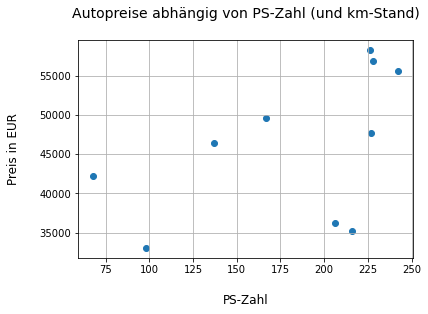

In [14]:
from matplotlib import pyplot as plt

plt.scatter(autos_ps_zahlen, autos_preise)
plt.title("Autopreise abhängig von PS-Zahl (und km-Stand)\n", fontsize=14)
plt.xlabel("\nPS-Zahl", fontsize=12)
plt.ylabel("Preis in EUR\n", fontsize=12)
plt.grid()
plt.show()

Als Vorbereitung für die Berechnung der linearen Regressionsgerade benötigen wir jetzt noch eine NumPy-Eingabematrix, die beide Eingabemerkmale (1D Arrays) in eine einzelnes 2D Eingabe-Array kombiniert:

        | km-Stand1   PS-Zahl1 |
    X = | km-Stand2   PS-Zahl2 |
        |   ...        ...     |
        | km-StandN   PS-ZahlN |

Dazu bereiten wir erstmal ein 2D Eingabe-Array entsprechender Größe mit lauter Nullen vor (eine *Null-Matrix*):

In [15]:
anz_merkmale = 2
X = np.zeros( (nr_bsp, anz_merkmale) )

In [16]:
X

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

Jetzt müssen wir die erste Spalte mit den km-Ständen füllen:

In [17]:
X[:,0] = autos_km_staende

In [18]:
X

array([[20810.,     0.],
       [26895.,     0.],
       [69734.,     0.],
       [35837.,     0.],
       [53281.,     0.],
       [32979.,     0.],
       [83387.,     0.],
       [21249.,     0.],
       [10578.,     0.],
       [83684.,     0.]])

Jetzt noch das Gleiche mit der zwieten Spalten. Diese muss mit den PS-Zahlen gefüllt werden:

In [19]:
X[:,1] = autos_ps_zahlen

In [20]:
X

array([[2.0810e+04, 2.4200e+02],
       [2.6895e+04, 1.6700e+02],
       [6.9734e+04, 9.8000e+01],
       [3.5837e+04, 6.8000e+01],
       [5.3281e+04, 2.2700e+02],
       [3.2979e+04, 1.3700e+02],
       [8.3387e+04, 2.0600e+02],
       [2.1249e+04, 2.2800e+02],
       [1.0578e+04, 2.2600e+02],
       [8.3684e+04, 2.1600e+02]])

NumPy benutzt hier bei der Ausgabe die wissenschaftliche `e+..`-Notation. Die liegt nicht jedem. Hier eine Möglichkeit diese zu unterdrücken:

In [21]:
np.set_printoptions(suppress=True)
X

array([[20810.,   242.],
       [26895.,   167.],
       [69734.,    98.],
       [35837.,    68.],
       [53281.,   227.],
       [32979.,   137.],
       [83387.,   206.],
       [21249.,   228.],
       [10578.,   226.],
       [83684.,   216.]])

Jetzt haben wir unser Eingabearray mit den beiden Eingabemerkmalen für die 10 Autos zusammen und können den linearen Zusammenhang zwischen den Eingaben *km-Stand* und *PS-Zahl* und dem Verkaufspreis eines Autos erlernen:

In [22]:
linear_model = LinearRegression()

reg = linear_model.fit(X, autos_preise)

Wir sind gespannt! Was schätzt unser lineares Modell nach dem *Lernen* für die multiplikativen Konstanten *a1*, *a2*?

In [23]:
reg.coef_

array([-0.29825864, 60.20947646])

Nicht schlecht! Die tatsächlichen Werte waren -0.3 und 50.0, aber wir haben ja auch noch ein zufälliges Rauschen auf den Verkaufspreis addiert. Daher können wir die exakten Werte auch nicht erwarten.

Und wie sieht es mit dem *Basispreis* *b* des Autos aus, das durch einen hohen km-Stand nach unten, bzw. durch einen hohe PS-Zahl nach oben  korrigiert wird?

In [24]:
reg.intercept_

48266.31014033347

Passt auch sehr gut! Man kann also sehen, dass hier alleine auf Grund von 10 Beispielautos die originalen Koeffizienten gut rekonstruieren ließen. Der Hintergrund ist, dass dieses Machine Learning Modell hier, der *lineare Regressor* nur 3 Parameter hat (`a1`, `a2`, `b`). So ein einfaches Modell lässt sich bereits durch wenige Beispieldaten sinnvoll parametrisieren.

# Grenzen der linearen Regression

Was ist aber, wenn der zugrunde liegende Zusammenhang gar kein linearer Zusammenhang ist, wir trotzdem versuchen eine lineare Regressionsgerade zu erlernen?

Oft gibt es nicht-lineare Zusammenhänge zwischen unabhängigen Variablen `x` und abhängigen Variablen `y=f(x)`. Bleiben wir bei unserem Autopreisbeispiel. Wir wissen intuitiv:

- sehr alte Autos sind als Oldtimer teuer
- Autos von ca. 15 Jahre alt, sind manchmal kurz davor kaputt zu gehen oder zumindestens Pannenanfälliger
- sehr neue Autos sind als Neuwagen teuer

Der Zusammenhang zwischen `x=Alter des Autos` und `f(x)=Verkaufspreis` könnte also in etwas so aussehen:

In [28]:
nr_bsp = 100

autos_alter = np.random.randint( low=0, high=40, size=(nr_bsp,) )

a = 100.0
b = 50000
autos_preise = [b + a*(alter-15)**2 for alter in autos_alter]

rauschen = np.random.normal(loc=0, scale=1000.0, size=nr_bsp)
#autos_preise += rauschen

In [29]:
autos_preise[:5]

[50900.0, 90000.0, 69600.0, 50100.0, 72500.0]

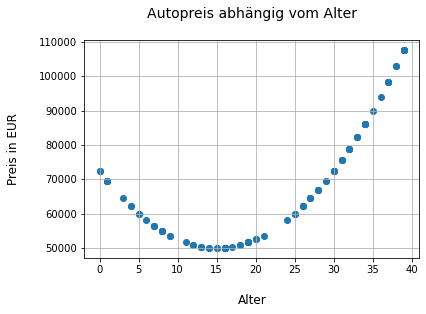

In [30]:
from matplotlib import pyplot as plt

plt.scatter(autos_alter, autos_preise)
plt.title("Autopreis abhängig vom Alter\n", fontsize=14)
plt.xlabel("\nAlter", fontsize=12)
plt.ylabel("Preis in EUR\n", fontsize=12)
plt.grid()
plt.show()

So in etwa könnte der Zusammenhang zwischen dem Alter eines Autos und dem Preis ganz grob aussehen:

* ein neues Auto kostet viel
* ein Jahreswagen mit ein paar Jahren auf dem Buckel kostet schon deutlich weniger,
  der Preis fällt dabei nicht-linear ab
* ein Auto mit 15 Jahren ist ganz schön fehleranfällig und kostet am wenigsten
* danach beginnt die "Oldtimer"-Zeit: der Preis steigt hier nicht-linear mit dem Alter

Was heißt hier eigentlich *nicht-linear*? Es bedeutet, dass man den Zusammenhang zwischen dem Preis und dem Alter eines Autos nicht durch eine Gerade

    Preis = b + a*Alter
    
beschreiben kann.

Wir versuchen es trotzdem mal! Lassen Sie uns einfach mit der linearen Regression hier versuchen den Zusammenhang abzubilden und schauen wir, was rauskommt!

In [31]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

reg = linear_model.fit(autos_alter.reshape(-1,1), autos_preise)

Jetzt lassen wir unser frisch gelerntes lineares Regressionsmodell (es dampft noch!) gleich ein paar Prädiktionen für unterschiedliche Alter von Autos vornehmen:

In [32]:
test_alter = np.arange(0,40,1).reshape(-1,1)

praedizierte_preise = linear_model.predict( test_alter )

In [34]:
praedizierte_preise[:10]

array([45960.14046883, 47016.73321337, 48073.3259579 , 49129.91870244,
       50186.51144698, 51243.10419151, 52299.69693605, 53356.28968058,
       54412.88242512, 55469.47516965])

Am besten sehen wir das *Generalisierungsverhalten* des Modells, indem wir die Prädiktionen plotten:

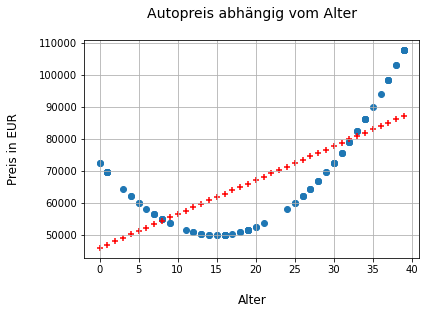

In [35]:
from matplotlib import pyplot as plt

plt.scatter(autos_alter, autos_preise)
plt.title("Autopreis abhängig vom Alter\n", fontsize=14)
plt.xlabel("\nAlter", fontsize=12)
plt.ylabel("Preis in EUR\n", fontsize=12)

# und jetzt auch noch die prädizierten Preise plotten
plt.scatter(test_alter, praedizierte_preise, marker="+", color="red")

plt.grid()
plt.show()

Wir sehen schön das lineare Verhalten unseres linearen Modells. Mehr kann so ein Modell halt nicht. Es ist eben ein lineares Regressionsmodell und passt die Parameter einer Regressionsgerade so an die Trainingsdaten (`autos_alter`, `autos_preise`) an, dass der mittlere quadratische Abstand (*Mean Squared Error = MSE*) der blauen Punkte zur Regressionsgeraden minimal wird.

# Lineare Regression über nicht-lineare Merkmalstransformation

Aber wie können wir es besser machen, wenn wir einen nicht-linearen Zusammenhang - wie hier - bereits vermuten?

Wir brauchen ein nicht-lineares, flexibleres, mächtigeres Modell, dass zum Beispiel beim Vorhandensein von zwei Merkmalen `x1`, `x2` den `y-Wert` als Polynom n-ten Grades Potenzen bis zum Grad n der Merkmalsvariablen `x1`, `x2` enthält:

    y = a0 + a1*x1 + a2*x2 + a3*x1*x2 + a4*x1^2 + a5*x1^2
    
Hier ist also n=2. Und jetzt kommt der Trick! Wenn wir den Vektor von Eingabemerkmalen [`x1`, `x2`] auf

    z =: [z1, z2, z3, z4, z5] =: [x1, x2, x1*x2, x1^2, x2^2]
    
erweitern, können wir wieder das Ganze wieder als ein lineares Modell auffassen:

    y = a0 + a1*z1 + a2*z2 + a3*z3 + a4*z4 + a5*z5
    
Wir erweitern also einfach den Vektor der Eingabemerkmale und können dann ganz normal eine lineare Regression durchfführen. Das Gesamtmodell ist dann nicht-linear und besteht aus:

* Erweiterung des Merkmalsvektors von [x1, x2] zu [x1, x2, x1*x2, x1^2, x2^2] := z
und
* Lineare Regression auf dem Merkmalsvektor `z`

Anders gesagt: die nicht-lineare Transformation der eigentlichen beiden Eingabemerkmale erlaubt es insgesamt nicht-lineare Zusammenhänge über die klassische lineare Regression zu erlernen!

# Nicht-lineare Merkmalstransformation

Glücklicherweise bietet scikit-learn wieder einmal eine hilfreiche Funktionalität namens `PolynomialFeatures` um bei gegebenen Merkmalen nicht-lineare Merkmalskombinationen (genauer: polynomielle Kombinationen) zu erlernen:

In [37]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

Sagen wir mal `X` wären die eigentlichen Inputbeispiele. Wir hätten hier also drei Inputbeispiele. Das erste Inputbeispiel wäre z.B. `[x1=0, x2=1]` und das zweite Inputbeispiel `[x1=2, x2=3]`.

Jetzt verwenden wir die Klasse `PolynomialFeatures` um aus der Matrix `X` eine neue Matrix `X2` zu machen, die dann aus folgenden Spalten besteht:

    |1, x1, x2, x1^2, x1*x2, x2^2|

In [42]:
poly = PolynomialFeatures(degree=2)
X2 = poly.fit_transform(X)
X2

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Statt `X` werden wir jetzt im Folgenden `X2` einfach als Merkmalsmatrix für unser lineares Regressionsmodell verwenden.

# Lineare Regression mit polynomiellen Merkmalen

Die Eingabemerkmale `X` waren ja nur ein Beispiel. Jetzt zurück zu unseren eigentlichen Eingabebeispielen, den Altersangaben der Autobeispiele:

In [43]:
autos_alter

array([18, 35, 29, 16, 30, 32, 32, 21,  1, 28, 16, 37,  8, 33, 11, 26, 14,
       38, 27, 39, 13,  5, 39,  6, 39,  7,  1, 38, 30, 16, 19, 27, 33, 19,
       17,  0, 39, 34, 34, 34, 26, 28, 39,  1, 16, 12,  1, 19, 30, 36,  9,
       39, 34, 37, 20, 39, 12,  8, 16,  4,  1, 30, 20, 13, 25, 32,  4, 13,
       33, 19,  3, 32, 34, 19, 24, 14, 16, 15, 37, 31, 16, 31, 15, 29, 37,
        0, 19,  7, 25, 28,  5, 18,  7,  1,  8, 27, 26, 31,  8,  9])

In [45]:
poly = PolynomialFeatures(degree=2)
autos_alter2 = poly.fit_transform( autos_alter.reshape(-1,1) )

In [47]:
autos_alter2[:10]

array([[   1.,   18.,  324.],
       [   1.,   35., 1225.],
       [   1.,   29.,  841.],
       [   1.,   16.,  256.],
       [   1.,   30.,  900.],
       [   1.,   32., 1024.],
       [   1.,   32., 1024.],
       [   1.,   21.,  441.],
       [   1.,    1.,    1.],
       [   1.,   28.,  784.]])

Wir sehen, dass aus Alter:

    | 1, Alter, Alter^2 |
    
gemacht wurde.

Die Schritte um einen linearen Regressor für die Schätzung des Autopreises auf Basis des Autoalters zu erlernen bleiben dann die gleichen:

In [52]:
linear_model_on_poly_features = LinearRegression()

reg = linear_model_on_poly_features.fit(autos_alter2, autos_preise)

Da wir aus dem einen Merkmal künstlich drei gemacht haben, müssten auch drei Koeffizienten erlernt worden sein:

In [53]:
reg.coef_

array([    0., -3000.,   100.])

In [54]:
reg.intercept_

72499.99999999985

Wir plotten jetzt mal wieder die Prädiktionen für einige Testbeispiele, um zu sehen, wie unser *lineares Regressionsmodell mit nicht-linearen polynomiellen Merkmalen* generalisiert.

In [56]:
test_alter = np.arange(0,40,1).reshape(-1,1)

# Nicht vergessen: Wir müssen auch die Testeingabebeispiele erweitern!
test_alter2 = poly.transform( test_alter )

praedizierte_preise = linear_model_on_poly_features.predict( test_alter2 )

In [58]:
praedizierte_preise

array([ 72500.,  69600.,  66900.,  64400.,  62100.,  60000.,  58100.,
        56400.,  54900.,  53600.,  52500.,  51600.,  50900.,  50400.,
        50100.,  50000.,  50100.,  50400.,  50900.,  51600.,  52500.,
        53600.,  54900.,  56400.,  58100.,  60000.,  62100.,  64400.,
        66900.,  69600.,  72500.,  75600.,  78900.,  82400.,  86100.,
        90000.,  94100.,  98400., 102900., 107600.])

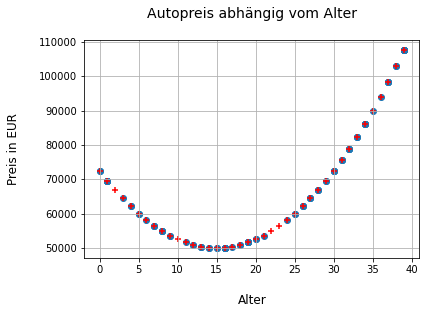

In [59]:
plt.scatter(autos_alter, autos_preise)
plt.title("Autopreis abhängig vom Alter\n", fontsize=14)
plt.xlabel("\nAlter", fontsize=12)
plt.ylabel("Preis in EUR\n", fontsize=12)

# und jetzt auch noch die prädizierten Preise plotten
plt.scatter(test_alter, praedizierte_preise, marker="+", color="red")

plt.grid()
plt.show()

Na das sieht doch schon anders aus!

Das Gesamtmodell hat es geschafft den nicht-linearen Zusammenhang zwischen Alter und Preis anhand der Trainingsdaten zu erkennen.